# Problem Set 4
## Muhammad Bashir

In [144]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

The file brazil_pnad96_ps4.out contains 65,801 comma delimited records drawn from the
1996 round of the Brazilian Pesquisas Nacional por Amostra de Domicilos (PNAD96). The
population corresponds to employed males between the ages of 20 and 60. Respondents with
incomplete data are dropped from the sample. Each record contains MONTHLY_EARNINGS,
YRSSCH, AgeInDays, Father_NoSchool_c, Father_1stPrim_c, Father_2ndPrim_c, Father_Sec_c, Father_DK_c,
Mom_NoSchool_c, Mom_1stPrim_c, Mom_2ndPrim_c, Mom_Sec_c, Mom_DK_c and ParentsSchooling.
The first three variables equal monthly earnings, years of completed schooling and age in
years (but measured to the precision of a day). The next 5 variables are dummies for father’s
level of education (no school, first primary cycle completed, second primary cycle completed,
secondary or more and ‘don’t know’). The next 5 variables are the corresponding dummies
for mother’s level of education. The final variable takes on 25 values corresponding to each
possible combination of parent’s schooling.

In [145]:
path = '/Users/muhammadbashir/GitHub/MuhammadCourses/Ec240a/Problem Sets/'

brazil_PNAD = pd.read_csv(path + 'Brazil_1996PNAD.out', delimiter='\t')

a.  Compute the least squares fit of ln(MONTHLY_EARNINGS) onto a constant YRSSCH, AgeInDays,
and AgeInDays squared. Construct a 95 percent confidence interval for the coefficient on
YrsSch. Write your own Python function to complete this computation. Your function
should also construct and return a variance-covariance estimate which can be used to con-
struct asymptotic standard errors. Compare your results – point estimates and standard
errors – with those of the StatsModels OLS implementation.

In [146]:
# compute log of monthly earnings
brazil_PNAD['Log_MONTHLY_EARNINGS'] = np.log(brazil_PNAD['MONTHLY_EARNINGS'])
# drop any missing or -inf values in y
brazil_PNAD = brazil_PNAD[np.isfinite(brazil_PNAD['Log_MONTHLY_EARNINGS'])]
# first use stats models to do linear regression of log of monthly earnings on constant, YRSSC,AgeInDays, and AgeInDays^2. Then write a actual function that does the same thing i.,e implements linear regression and asympotic variance-covariance matrix
# Add a constant term to the dataframe
brazil_PNAD['const'] = 1

# Create the independent variables dataframe
X = brazil_PNAD[['const', 'YRSSCH', 'AgeInDays']]
X['AgeInDays2'] = X['AgeInDays'] ** 2

# Define the dependent variable
y = brazil_PNAD['Log_MONTHLY_EARNINGS']
# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Log_MONTHLY_EARNINGS   R-squared:                       0.462
Model:                              OLS   Adj. R-squared:                  0.462
Method:                   Least Squares   F-statistic:                 1.770e+04
Date:                  Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                          18:44:22   Log-Likelihood:                -77088.
No. Observations:                 66506   AIC:                         1.542e+05
Df Residuals:                     66502   BIC:                         1.542e+05
Df Model:                             3                                         
Covariance Type:                    HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8243      0.021

In [147]:
def linear_regression(y, X):
    # Compute the coefficients
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    # Compute the residuals
    e = y -  np.dot(X,beta)
    # Compute the variance-covariance matrix
    sigma2 = e.T @ e / (len(y) - len(beta))
    vcov = sigma2 * np.linalg.inv(X.T @ X)
    # take diagonal elements for SEs
    se = np.sqrt(np.diag(vcov))
    return beta, se, vcov

# Fit the model
beta, se, vcov = linear_regression(y, X)
se = np.round(se, 3)
# Print the results
print('Beta:', beta)
print('Standard errors:', se)
# print('Variance-covariance matrix:', vcov)


Beta: 0    2.824276
1    0.145861
2    0.097871
3   -0.000975
dtype: float64
Standard errors: [0.021 0.001 0.001 0.   ]


As we can see these standard errors and coefficeints are same as the the ones from stats models. 

b. Compute the least squares fit of ln(MONTHLY_EARNINGS) onto a constant YRSSCH, AgeInDays,
AgeInDays squared, Father_NoSchool_c, Father_1stPrim_c, Father_2ndPrim_c, Father_Sec_c, Mom_NoSchool_c,Mom_1stPrim_c, Mom_2ndPrim_c, and Mom_Sec_c. Then compare coefficeint on YRSSCH. 

In [148]:
# define design matrix for constant YRSSCH, AgeInDays, AgeInDays squared, Father_NoSchool_c, Father_1stPrim_c, Father_2ndPrim_c, Father_Sec_c, Mom_NoSchool_c,Mom_1stPrim_c, Mom_2ndPrim_c, and Mom_Sec_c. 

X = brazil_PNAD[['const', 'YRSSCH', 'AgeInDays', 'Father_NoSchool', 'Father_Incomplete1stPrimary', 'Father_Complete1stPrimary', 'Father_Incomplete2ndPrimary', 'Father_Complete2ndPrimary', 'Father_IncompleteSecondary', 'Father_CompleteSecondary', 'Mother_NoSchool', 'Mother_Incomplete1stPrimary', 'Mother_Complete1stPrimary', 'Mother_Incomplete2ndPrimary', 'Mother_Complete2ndPrimary', 'Mother_IncompleteSecondary', 'Mother_CompleteSecondary']]
X['AgeInDays2'] = X['AgeInDays'] ** 2
y = brazil_PNAD['Log_MONTHLY_EARNINGS']
# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Log_MONTHLY_EARNINGS   R-squared:                       0.470
Model:                              OLS   Adj. R-squared:                  0.470
Method:                   Least Squares   F-statistic:                     3220.
Date:                  Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                          18:44:22   Log-Likelihood:                -76567.
No. Observations:                 66506   AIC:                         1.532e+05
Df Residuals:                     66488   BIC:                         1.533e+05
Df Model:                            17                                         
Covariance Type:                    HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

This coefficient is very similar to one in short regression. This means these father and mother education variables are not correlated with years of schooling and age. 

In [149]:
# Let us apply FWL theorem to the above regression. We will first regress YRSSCH on all the independent variables in the above regression. Then we will compute the residuals from this regression and regress the log of monthly earnings on these residuals.

# Compute the residuals from the long regression
X_long = brazil_PNAD[['const', 'AgeInDays', 'Father_NoSchool', 'Father_Incomplete1stPrimary', 'Father_Complete1stPrimary', 'Father_Incomplete2ndPrimary', 'Father_Complete2ndPrimary', 'Father_IncompleteSecondary', 'Father_CompleteSecondary', 'Mother_NoSchool', 'Mother_Incomplete1stPrimary', 'Mother_Complete1stPrimary', 'Mother_Incomplete2ndPrimary', 'Mother_Complete2ndPrimary', 'Mother_IncompleteSecondary', 'Mother_CompleteSecondary']]
X_long['AgeInDays2'] = X_long['AgeInDays'] ** 2
y = brazil_PNAD['YRSSCH']
beta_long, se_long, vcov_long = linear_regression(y, X_long)
e_long = y - np.dot(X_long, beta_long)

# now regress y on these residuals
y = brazil_PNAD['Log_MONTHLY_EARNINGS']
model = sm.OLS(y, e_long).fit(cov_type='HC3')
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Log_MONTHLY_EARNINGS   R-squared (uncentered):                   0.007
Model:                              OLS   Adj. R-squared (uncentered):              0.007
Method:                   Least Squares   F-statistic:                              437.2
Date:                  Fri, 29 Nov 2024   Prob (F-statistic):                    8.97e-97
Time:                          18:44:22   Log-Likelihood:                     -2.1135e+05
No. Observations:                 66506   AIC:                                  4.227e+05
Df Residuals:                     66505   BIC:                                  4.227e+05
Df Model:                             1                                                  
Covariance Type:                    HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

We showed that we can use FWL theorem to run two regressions to estimate coefficient on YRSSCH. We first predict YRSSCH using all of other co-regressors and then predict residuls of this regression. Then we regress outcome our outcome of interest on these residuals. This gives same coefficient as you would get by regressing y direclty on all outcomes together. 

d. Using the Bayes’ Bootstrap to approximate a posterior distribution of the coefficient
on YRSSCH in the linear predictors described in parts [a] and [b]. How do these posterior
distributions compare with their estimated asymptotic sampling distributions?

## Distributions from Q A

In [150]:
## define function that calcualtes Bayesian distribution of linear predicors 

def bayesian_distribution(data,y,ind_vars, coef='YRSSCH',n_bootstraps=1000):
    N = len(data)
    # subset data to only include the variables of interest
    data = data[[y] + ind_vars]
    # array to store Bayesian distribution
    bayesian = np.zeros(n_bootstraps)

    # perform bayesian bootstraps
    for i in range(n_bootstraps):
        # use gamma prior as weights 
        gamma = np.random.gamma(1, 1, N)
        gamma = gamma / np.sum(gamma)      # normalize weights
        #  define regression formula
        formula = f'{y} ~ -1 + {" + ".join(ind_vars)}'
        b_model = sm.WLS.from_formula(formula, data=data, weights=gamma).fit()
        # extract the coefficient of interest
        bayesian[i] = b_model.params[coef]
    return bayesian

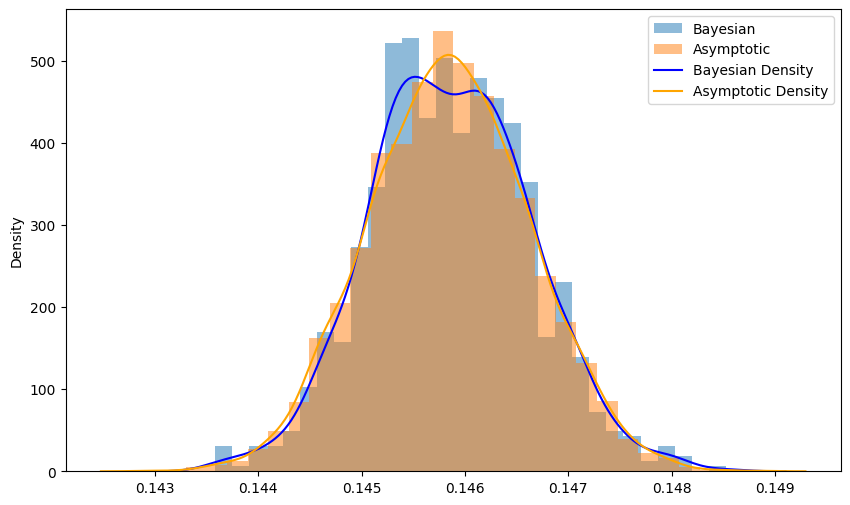

In [151]:
y = "Log_MONTHLY_EARNINGS"
ind_vars = ['const', 'AgeInDays','AgeInDays2', 'YRSSCH']
brazil_PNAD['AgeInDays2'] = brazil_PNAD['AgeInDays'] ** 2
bayesian = bayesian_distribution(brazil_PNAD, y,ind_vars, coef )
# Also do OLS asympotic distribution
y = brazil_PNAD['Log_MONTHLY_EARNINGS']
X = brazil_PNAD[['const', 'YRSSCH', 'AgeInDays', 'AgeInDays2']]
model = sm.OLS(y, X).fit(cov_type='HC3')
beta_YRSSCH = model.params['YRSSCH']
se_YRSSCH = model.HC3_se['YRSSCH']
# generate normal distribution for these asympotic values
np.random.seed(0)
asympotic = np.random.normal(beta_YRSSCH, se_YRSSCH, 5000)

# plot densities
plt.figure(figsize=(10, 6))
plt.hist(bayesian, bins=30, density=True, alpha=0.5, label='Bayesian')
plt.hist(asympotic, bins=30, density=True, alpha=0.5, label='Asymptotic')
sns.kdeplot(bayesian, color='blue', label='Bayesian Density')
sns.kdeplot(asympotic, color='orange', label='Asymptotic Density')
plt.legend()
plt.show()

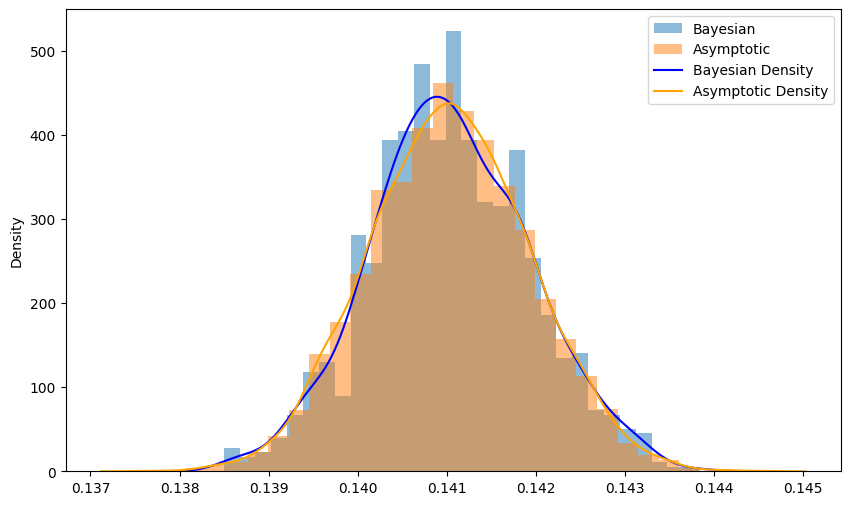

In [152]:
y = "Log_MONTHLY_EARNINGS"
ind_vars = ['const', 'AgeInDays','AgeInDays2','YRSSCH', 'Father_NoSchool', 'Father_Incomplete1stPrimary', 'Father_Complete1stPrimary', 'Father_Incomplete2ndPrimary', 'Father_Complete2ndPrimary', 'Father_IncompleteSecondary', 'Father_CompleteSecondary', 'Mother_NoSchool', 'Mother_Incomplete1stPrimary', 'Mother_Complete1stPrimary', 'Mother_Incomplete2ndPrimary', 'Mother_Complete2ndPrimary', 'Mother_IncompleteSecondary', 'Mother_CompleteSecondary']
bayesian = bayesian_distribution(brazil_PNAD, y,ind_vars, coef )
# Also do OLS asympotic distribution
y = brazil_PNAD['Log_MONTHLY_EARNINGS']
X = brazil_PNAD[['const', 'AgeInDays','AgeInDays2','YRSSCH', 'Father_NoSchool', 'Father_Incomplete1stPrimary', 'Father_Complete1stPrimary', 'Father_Incomplete2ndPrimary', 'Father_Complete2ndPrimary', 'Father_IncompleteSecondary', 'Father_CompleteSecondary', 'Mother_NoSchool', 'Mother_Incomplete1stPrimary', 'Mother_Complete1stPrimary', 'Mother_Incomplete2ndPrimary', 'Mother_Complete2ndPrimary', 'Mother_IncompleteSecondary', 'Mother_CompleteSecondary']]
model = sm.OLS(y, X).fit(cov_type='HC3')
beta_YRSSCH = model.params['YRSSCH']
se_YRSSCH = model.HC3_se['YRSSCH']
# generate normal distribution for these asympotic values
np.random.seed(0)
asympotic = np.random.normal(beta_YRSSCH, se_YRSSCH, 5000)

# plot densities
plt.figure(figsize=(10, 6))
plt.hist(bayesian, bins=30, density=True, alpha=0.5, label='Bayesian')
plt.hist(asympotic, bins=30, density=True, alpha=0.5, label='Asymptotic')
sns.kdeplot(bayesian, color='blue', label='Bayesian Density')
sns.kdeplot(asympotic, color='orange', label='Asymptotic Density')
plt.legend()
plt.show()

Both Bayesian and asymptotic OLS distributions look very similar. We can probably make them much closer by doing larger bootstrape samples. 